<a href="https://colab.research.google.com/github/mpdrls/pGC/blob/main/geminiCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO 1 CIENCIA DATOS INTEGRAL

paso 1

autenticacion exitosa
conexion exitosa
consulta exitosa


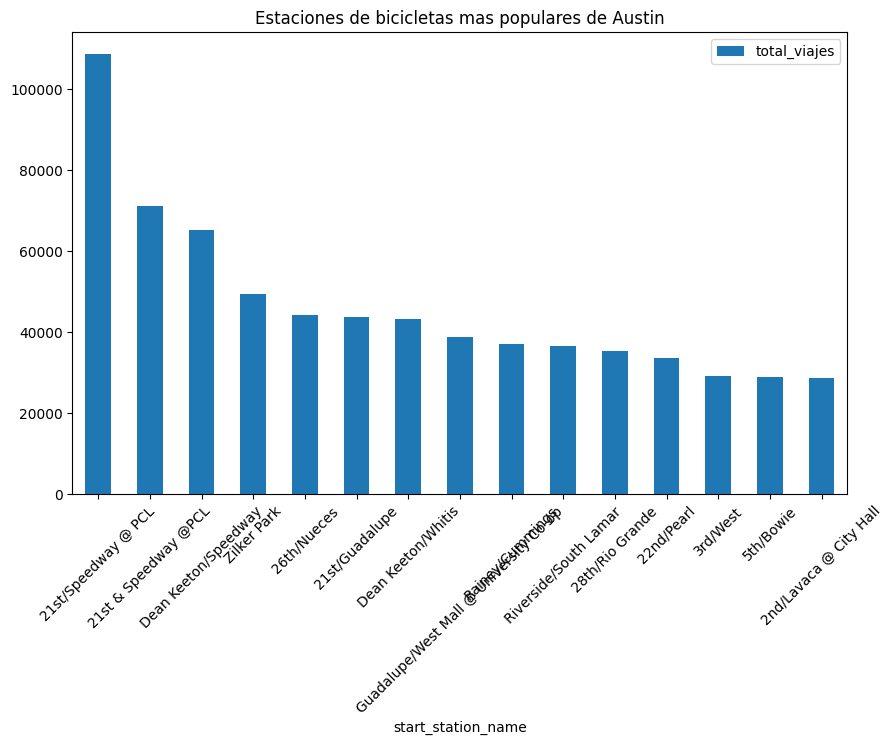

FINALIZADO


In [27]:
from google.colab import auth
auth.authenticate_user()
print('autenticacion exitosa')

from google.cloud import bigquery
import pandas as pd

# Your actual Google Cloud Project ID where billing is enabled
billing_project_id = 'mi-primer-proyecto-data-484520'

client = bigquery.Client(project=billing_project_id)
print("conexion exitosa")
query = """
SELECT
    start_station_name,
    COUNT(*) as total_viajes,
    AVG(duration_minutes) as duracion_promedio
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`
WHERE start_station_name IS NOT NULL
GROUP BY 1
ORDER BY total_viajes DESC
LIMIT 15
"""
print("consulta exitosa")

df = client.query(query).to_dataframe()
df.head()

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
df.plot(x='start_station_name', y='total_viajes', kind='bar', figsize=(10,6))
plt.title('Estaciones de bicicletas mas populares de Austin')
plt.xticks(rotation=45)
plt.show()

print("FINALIZADO")

paso 2

In [30]:
# con el df anterior, vamos a comvertir tiempo a formato real de python
query_v2 = """
SELECT
    start_time, duration_minutes, subscriber_type
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`
WHERE start_time IS NOT NULL
LIMIT 5000
"""
print("consulta exitosa")

df_v2 = client.query(query_v2).to_dataframe()
df_v2['dia de semana'] = df_v2['start_time'].dt.day_name()
df_v2['es_fin_de_semana'] = df_v2['start_time'].dt.dayofweek >= 5
print("creacion de nuevas columnas exitosa")
print(df_v2.head())
analisis = df_v2.groupby('es_fin_de_semana')['duration_minutes'].mean()
print("duracion promedio (minutos): ")
print(analisis)
print("analisis exitoso")
print("FINALIZADO")

consulta exitosa
creacion de nuevas columnas exitosa
                 start_time  duration_minutes  subscriber_type dia de semana  \
0 2022-05-06 14:19:39+00:00               195  Pay-as-you-ride        Friday   
1 2022-05-23 16:24:46+00:00                 2  3-Day Weekender        Monday   
2 2022-05-06 14:37:41+00:00               178  Pay-as-you-ride        Friday   
3 2022-05-17 22:50:29+00:00                 4          Local31       Tuesday   
4 2022-05-29 19:41:40+00:00                31  Pay-as-you-ride        Sunday   

   es_fin_de_semana  
0             False  
1             False  
2             False  
3             False  
4              True  
duracion promedio (minutos): 
es_fin_de_semana
False    37.080434
True       47.3594
Name: duration_minutes, dtype: Float64
analisis exitoso
FINALIZADO


paso 3 visualizacion

configuracion exitosa
personalizacion exitosa


/tmp/ipython-input-1233075173.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=analisis.index, y=analisis.values, palette="viridis")


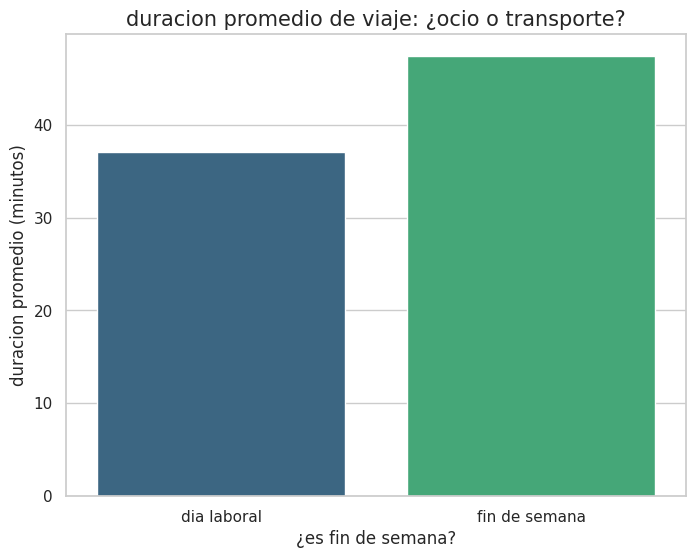

FINALIZADO


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
print("configuracion exitosa")

plt.figure(figsize=(8, 6))
sns.barplot(x=analisis.index, y=analisis.values, palette="viridis")
plt.title("duracion promedio de viaje: ¿ocio o transporte?", fontsize=15)
plt.xlabel("¿es fin de semana?", fontsize=12)
plt.ylabel("duracion promedio (minutos)", fontsize=12)
plt.xticks([0,1],['dia laboral', 'fin de semana'])
print("personalizacion exitosa")


plt.show()
print("FINALIZADO")